# Порівняння швикості алгоритмів пошуку Боєра-Мура, Кнута-Морріса-Пратта та Рабіна-Карпа

In [14]:
# змініть на false для запуску з не-колаба
is_gooogle_collab = True

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Завантаження текстів

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
if is_gooogle_collab:

  with open('/content/drive/MyDrive/Univ/Hometask/goit-algo-hw-05/стаття 1.txt', encoding='utf-8') as f:
      text1 = ''.join(f.readlines())
  with open('/content/drive/MyDrive/Univ/Hometask/goit-algo-hw-05/стаття 2.txt', encoding='utf-8') as f:
      text2 = ''.join(f.readlines())

else:

  with open("стаття 1.txt", encoding='utf-8') as f:
      text1 = ''.join(f.readlines())
  with open("стаття 2.txt", encoding='utf-8') as f:
      text2 = ''.join(f.readlines())


In [18]:
import random
import timeit
from collections import namedtuple

# kmp search

def compute_lps(pattern):
    lps = [0] * len(pattern)
    length = 0
    i = 1

    while i < len(pattern):
        if pattern[i] == pattern[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                length = lps[length - 1]
            else:
                lps[i] = 0
                i += 1

    return lps

def kmp_search(main_string, pattern):
    M = len(pattern)
    N = len(main_string)

    lps = compute_lps(pattern)

    i = j = 0

    while i < N:
        if pattern[j] == main_string[i]:
            i += 1
            j += 1
        elif j != 0:
            j = lps[j - 1]
        else:
            i += 1

        if j == M:
            return i - j

    return -1  # якщо підрядок не знайдено

# boyer-moore search

def build_shift_table(pattern):
  table = {}
  length = len(pattern)

  for index, char in enumerate(pattern[:-1]):
    table[char] = length - index - 1

  table.setdefault(pattern[-1], length)
  return table

def boyer_moore_search(text, pattern):
  shift_table = build_shift_table(pattern)
  i = 0

  while i <= len(text) - len(pattern):
    j = len(pattern) - 1

    while j >= 0 and text[i + j] == pattern[j]:
      j -= 1

    if j < 0:
      return i

    i += shift_table.get(text[i + len(pattern) - 1], len(pattern))

  return -1

# rabin-karp search

def polynomial_hash(s, base=256, modulus=101):
    n = len(s)
    hash_value = 0
    for i, char in enumerate(s):
        power_of_base = pow(base, n - i - 1) % modulus
        hash_value = (hash_value + ord(char) * power_of_base) % modulus
    return hash_value

def rabin_karp_search(main_string, substring):
    substring_length = len(substring)
    main_string_length = len(main_string)

    base = 256
    modulus = 101

    substring_hash = polynomial_hash(substring, base, modulus)
    current_slice_hash = polynomial_hash(main_string[:substring_length], base, modulus)

    h_multiplier = pow(base, substring_length - 1) % modulus

    for i in range(main_string_length - substring_length + 1):
        if substring_hash == current_slice_hash:
            if main_string[i:i+substring_length] == substring:
                return i

        if i < main_string_length - substring_length:
            current_slice_hash = (current_slice_hash - ord(main_string[i]) * h_multiplier) % modulus
            current_slice_hash = (current_slice_hash * base + ord(main_string[i + substring_length])) % modulus
            if current_slice_hash < 0:
                current_slice_hash += modulus

    return -1

pattern = "бібліотека"

def measure_duration(algorythm, text, pattern):
    start = timeit.default_timer()
    algorythm(text, pattern)
    end = timeit.default_timer()
    return end - start

results = []
algs = {'Кнута-Морріса-Пратта': (lambda text, pattern: kmp_search(text, pattern)), 'Боєра-Мура': (lambda text, pattern: boyer_moore_search(text, pattern)), 'Рабіна-Карпа': (lambda text, pattern: rabin_karp_search(text, pattern))}
texts = {'Текст 1': text1, 'Текст 2': text2 }

Pattern = namedtuple('Pattern', 'text isavailable')

for pattern in [Pattern('пошуку', 'found'),  Pattern('немаєтакогослова', 'not found')]:
    for alg_name, alg_code in algs.items():
        for textname, text in texts.items():
            duration = measure_duration(alg_code, text, pattern.text)

            results.append({'alg': alg_name, 'text': textname, 'pattern': pattern.text, 'isavailable': pattern.isavailable, 'duration': duration})

results

print(results)

[{'alg': 'Кнута-Морріса-Пратта', 'text': 'Текст 1', 'pattern': 'пошуку', 'isavailable': 'found', 'duration': 0.0013106910000715288}, {'alg': 'Кнута-Морріса-Пратта', 'text': 'Текст 2', 'pattern': 'пошуку', 'isavailable': 'found', 'duration': 0.003852456999993592}, {'alg': 'Боєра-Мура', 'text': 'Текст 1', 'pattern': 'пошуку', 'isavailable': 'found', 'duration': 0.0008399019998250878}, {'alg': 'Боєра-Мура', 'text': 'Текст 2', 'pattern': 'пошуку', 'isavailable': 'found', 'duration': 0.0021427450001283432}, {'alg': 'Рабіна-Карпа', 'text': 'Текст 1', 'pattern': 'пошуку', 'isavailable': 'found', 'duration': 0.003093220000664587}, {'alg': 'Рабіна-Карпа', 'text': 'Текст 2', 'pattern': 'пошуку', 'isavailable': 'found', 'duration': 0.009082855000087875}, {'alg': 'Кнута-Морріса-Пратта', 'text': 'Текст 1', 'pattern': 'немаєтакогослова', 'isavailable': 'not found', 'duration': 0.00611533600022085}, {'alg': 'Кнута-Морріса-Пратта', 'text': 'Текст 2', 'pattern': 'немаєтакогослова', 'isavailable': 'not 

# Аналіз результатів


In [19]:
df = pd.DataFrame(results)
df

,alg,text,pattern,isavailable,duration
0,Кнута-Морріса-Пратта,Текст 1,пошуку,found,0.001311
1,Кнута-Морріса-Пратта,Текст 2,пошуку,found,0.003852
2,Боєра-Мура,Текст 1,пошуку,found,0.000840
3,Боєра-Мура,Текст 2,пошуку,found,0.002143
4,Рабіна-Карпа,Текст 1,пошуку,found,0.003093
5,Рабіна-Карпа,Текст 2,пошуку,found,0.009083
6,Кнута-Морріса-Пратта,Текст 1,немаєтакогослова,not found,0.006115
7,Кнута-Морріса-Пратта,Текст 2,немаєтакогослова,not found,0.009110
8,Боєра-Мура,Текст 1,немаєтакогослова,not found,0.001504
9,Боєра-Мура,Текст 2,немаєтакогослова,not found,0.002151


In [20]:
df_found = df[df['isavailable'] == 'found']

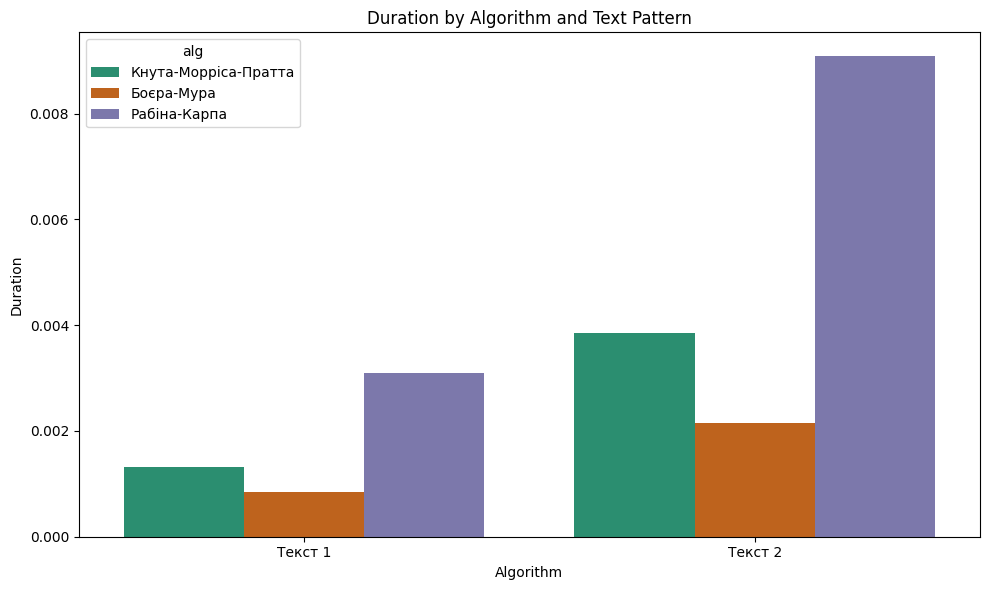

In [21]:
# @title Тривалість для існуючого слова

plt.figure(figsize=(10, 6))
sns.barplot(data=df_found, x='text', y='duration', hue='alg', palette='Dark2')

plt.xlabel('Algorithm')
plt.ylabel('Duration')
plt.title('Duration by Algorithm and Text Pattern')

plt.tight_layout()
plt.show()

In [22]:
df_notfound = df[df['isavailable'] == 'not found']

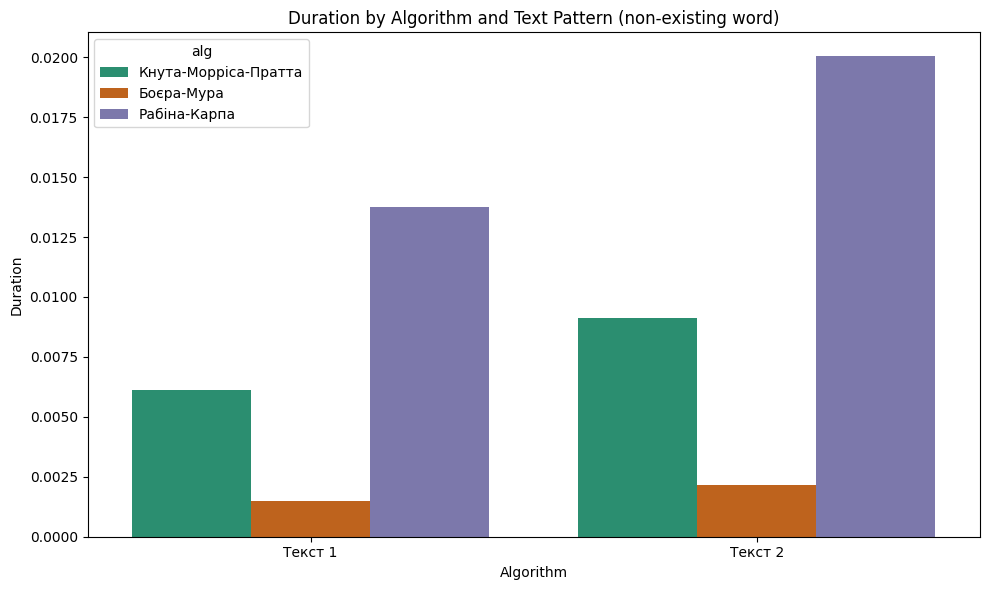

In [23]:
# @title Тривалість для не існуючого слова

plt.figure(figsize=(10, 6))
sns.barplot(data=df_notfound, x='text', y='duration', hue='alg', palette='Dark2')

plt.xlabel('Algorithm')
plt.ylabel('Duration')
plt.title('Duration by Algorithm and Text Pattern (non-existing word)')

plt.tight_layout()
plt.show()

# Висновки



Порівняння ефективності алгоритмів:

Для алгоритму Кнута-Морріса-Пратта:

- Для шаблону "пошуку" часи варіюються від 0.001358 до 0.003392 секунди, що є середнім показником серед усіх алгоритмів.
- Для шаблону "немаєтакогослова" часи значно збільшуються, що може свідчити про зниження ефективності при відсутності збігів.

Для алгоритму Боєра-Мура:

- Показує найкращі результати за часом пошуку шаблону як для "пошуку", так і для "немаєтакогослова".
- Найшвидший алгоритм для обох типів шаблонів у цьому наборі даних.

Для алгоритму й Рабіна-Карпа:

- Найгірший час пошуку як для "пошуку", так і для "немаєтакогослова", особливо для шаблонів, яких немає у тексті.

Алгоритм Боєра-Мура є найефективнішим за часом виконання у цьому наборі даних, незалежно від того, чи знайдено шаблон у тексті.

Алгоритм Кнута-Морріса-Пратта займає середнє місце за ефективністю.

Алгоритм Рабіна-Карпа показує найгірші результати за часом виконання, особливо при пошуку шаблонів, яких немає у тексті.